Iris CSV columns: ['PC1', 'PC2', 'target', 'target_name']
        PC1       PC2  Target
0 -3.469525  0.446808       0
1 -2.849317 -0.304353       0
2 -2.859561  0.112432       0
3 -2.982090  0.177249       0
4 -2.903903 -0.373821       0


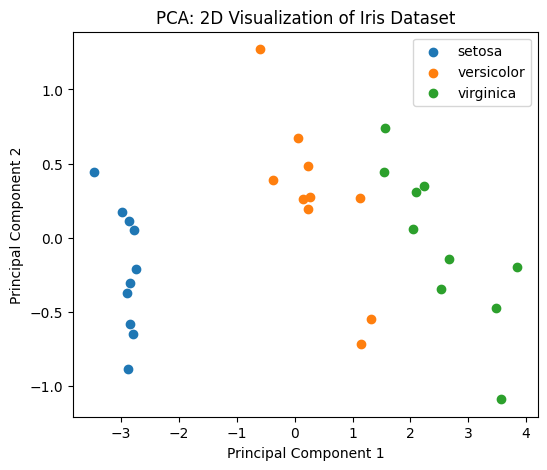

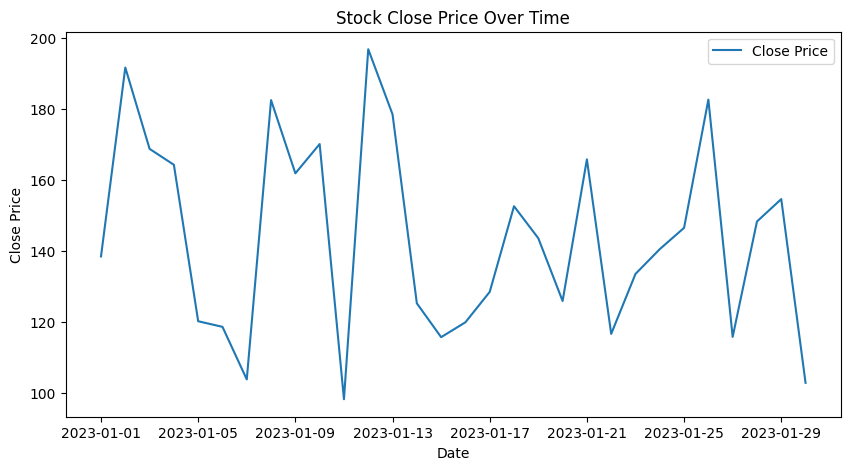

MAE: 20.89
RMSE: 26.25
MAPE: 16.18%


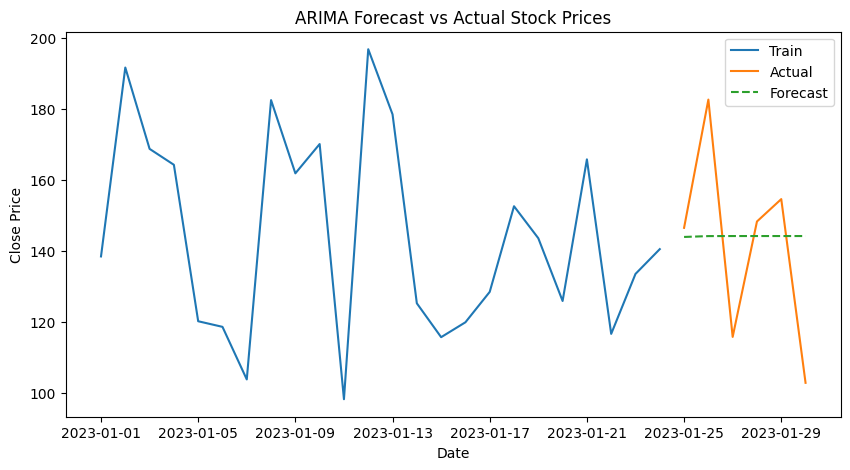

In [1]:
# --- Part 1: Dimensionality Reduction (PCA) ---

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# 2. Load High-Dimensional Dataset (Iris from CSV)
iris_df = pd.read_csv('c://Users//saile//Downloads//iris_dataset.csv')
print('Iris CSV columns:', iris_df.columns.tolist())  # Debug: print columns
# Use the last column as the target, all others as features
feature_cols = iris_df.columns[:-1]
target_col = iris_df.columns[-1]
X = iris_df[feature_cols].values
y = LabelEncoder().fit_transform(iris_df[target_col])

# 3. Apply PCA to Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 4. Reduced Dataset (2D)
reduced_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
reduced_df['Target'] = y
print(reduced_df.head())

# 5. Scatter Plot of Reduced Data
plt.figure(figsize=(6,5))
for label in set(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=f'{iris_df[target_col].unique()[label]}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Visualization of Iris Dataset')
plt.legend()
plt.show()

# --- Part 2: Stock Price Prediction Using ARIMA ---

# 1. Import Libraries (already imported above)
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# 2. Load and Preprocess the Dataset
stock_df = pd.read_csv('c://Users//saile//Downloads//stock_prices.csv')  # Ensure this file has Date, Open, Close, Volume
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df = stock_df.sort_values('Date')
stock_df = stock_df.dropna()
stock_df = stock_df.set_index('Date')
stock_df = stock_df.asfreq('D')  # Set frequency to daily to suppress ARIMA warning

# 3. EDA: Plot Close Prices
plt.figure(figsize=(10,5))
plt.plot(stock_df.index, stock_df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.show()

# 4. Feature Engineering: Lag Feature & Moving Average
stock_df['Close_Lag1'] = stock_df['Close'].shift(1)
stock_df['Close_MA7'] = stock_df['Close'].rolling(window=7).mean()

# 5. Prepare Data for ARIMA (use Close price only)
close_series = stock_df['Close'].dropna()
train_size = int(len(close_series) * 0.8)
train, test = close_series[:train_size], close_series[train_size:]

# 6. Train ARIMA Model (p=1, d=1, q=1 as default, can be tuned)
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(test))

# 7. Model Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2%}')

# 8. Plot Forecast vs Actual
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecast vs Actual Stock Prices')
plt.legend()
plt.show()
